<h1 style='color:white; background-color:darksalmon;margin:auto'>Heart Disease Data Set</h1>
<p><b>Data set found from the Kaggle website, or by clicking on the following link:</b> 
    <br>
    <a href="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download" target="_blank">www.kaggle.come/heart-disease</a></p>

<hr>
<h2 style='color:darksalmon'><u>Background Information</u></h2>
<p>The purpose of the data set and study is to predict whether certain health indicators will lead to heart disease--and/or what are key indicators of heart disease in individuals. The heart disease data set has over 319795 observsations with the following columns. </p>

In [3]:
# pip install when necessary
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
hd = pd.read_csv("heart_disease_df.csv")
columns = hd.columns
shape = hd.shape 
for leng in range(0,len(columns)): 
        print('{}.) {}'.format(leng+1,columns[leng]))
print("\nNumber of Observations: {} \nNumber of Variables: {}".format(shape[0],shape[1]))

1.) HeartDisease
2.) BMI
3.) Smoking
4.) AlcoholDrinking
5.) Stroke
6.) PhysicalHealth
7.) MentalHealth
8.) DiffWalking
9.) Sex
10.) AgeCategory
11.) Race
12.) Diabetic
13.) PhysicalActivity
14.) GenHealth
15.) SleepTime
16.) Asthma
17.) KidneyDisease
18.) SkinCancer

Number of Observations: 319795 
Number of Variables: 18


<hr>
<h2 style='color:darksalmon'><u>Inspecting the Data:</u></h2>


In [83]:
hd.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [118]:
# Checking data types of each variable
#hd.info() could be done instead, but I prefer the below method because its more clean
print('\n{} \n\nNumber of Columns Not Missing Values: {}'.format(hd.dtypes,hd.isna().any().value_counts()[0]))
# hd.dropna(subset=["HeartDisease"], inplace=True) #we would want to do for the target variable when observation misses the target


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object 

Number of Columns Not Missing Values: 18


<p style='color:darksalmon;'><i>Going to need to transform certain variables into categoricals. The check necessary for this can be found below:</i></p>

In [3]:
for feature in hd.columns: # checking each variable for whether or not its gonna be a categorical
    print(feature)
    print(hd[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


In [118]:
hd.describe() #basic stats for numerical. I can clearly see that the only true numerical val is BMI (continuous)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


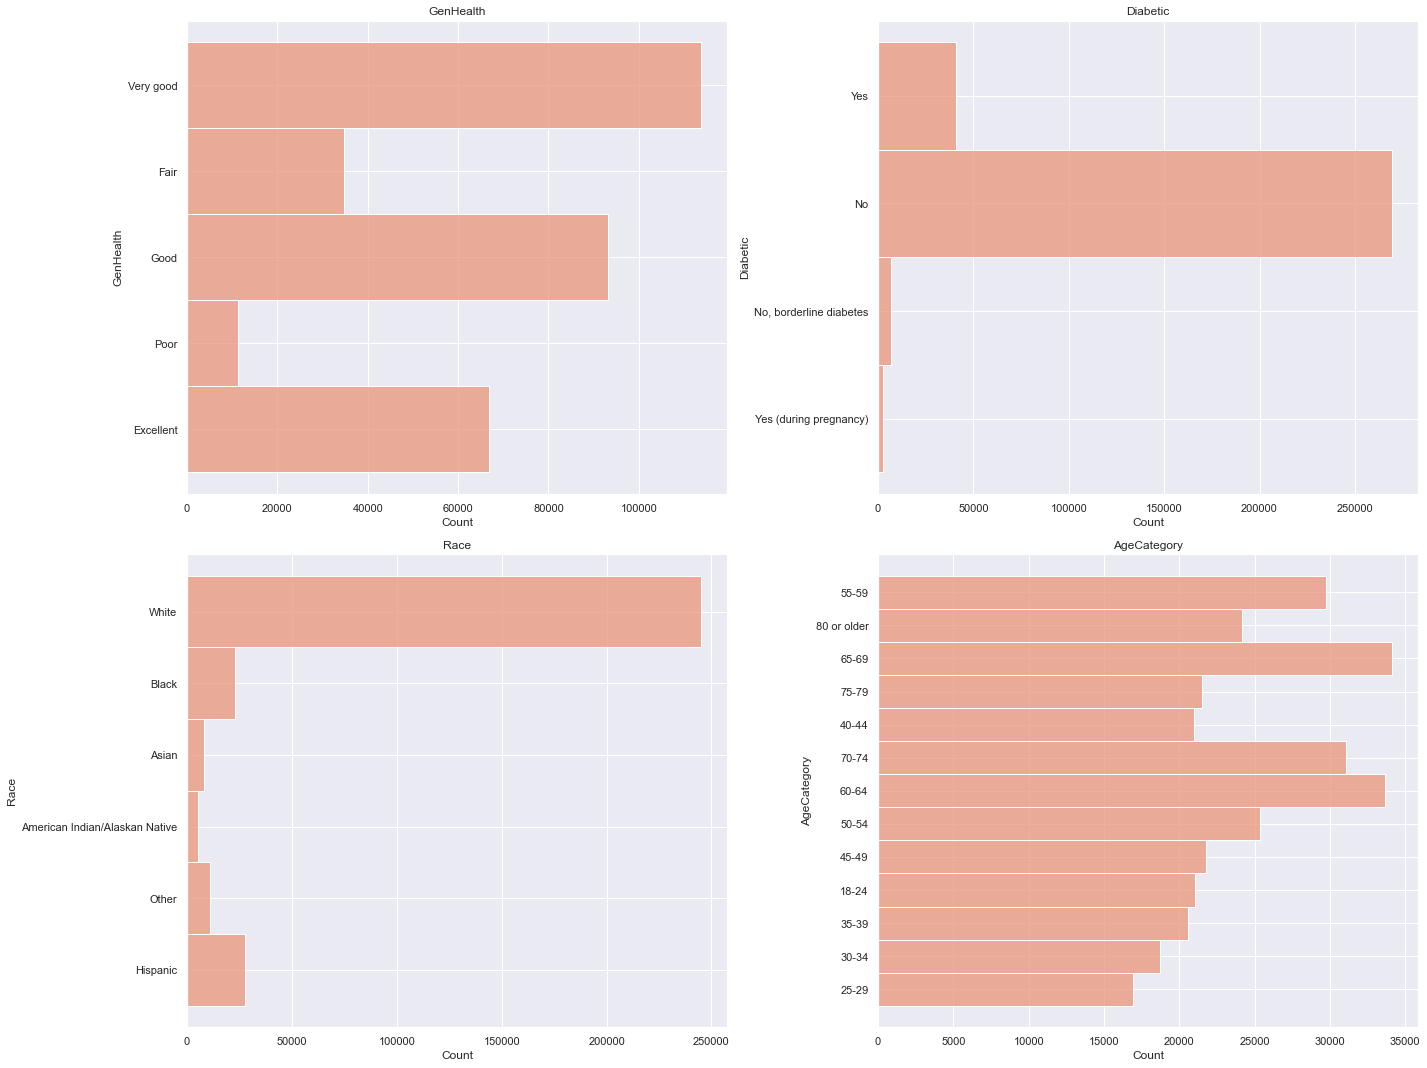

In [191]:
# Interesting variables based on my first assumptions
vari = hd[['GenHealth','Diabetic','Race','AgeCategory']]
# for feature in range(0,len(vari)):
#     fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(5, 3))
#     axes[feature].hist(hd.iloc[:,feature])
position_index = [(0,0),(0,1),(1,0),(1,1)]
fig,axes = plt.subplots(2,2,figsize=(20,15))

for position, feature in zip(position_index, vari):
    sns.histplot(ax=axes[position],y=hd.loc[:,feature], color='darksalmon')
    axes[position].set_title(feature)
        
fig.tight_layout()
plt.show()
    

<hr>
<h2 style='color:darksalmon'><u>Handling Categorical Values:</u></h2>
    <p>Every column except BMI will be transformed into a <b>categorical type</b>. This is because machine learning methods tend to work more effectively with numerical inputs(ML doesn't do well with non-numerical inputs). I am choosing to do the Ordinal version of categorical transformations as to save run time and decrease the number of  potential features for the predictive model--a balancing act in a sense.</p>

In [5]:
#pip install sklearn
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# hd_Ordcat = list(hd.columns[~hd.columns.isin(["BMI","AgeCategory","Diabetic","GenHealth"])])
hd_cat = list(hd.loc[:, hd.columns != 'BMI'].columns)


full_pipline = ColumnTransformer([
    ("ordinal", OrdinalEncoder(), hd_cat)
#     ("onehot", OneHotEncoder(), hd_Hotcat)
])
    
hd_prep = hd.copy()
hd_prep[hd_cat] = full_pipline.fit_transform(hd)
hd_prep = pd.DataFrame(hd_prep)



<p style='color:darksalmon;'><i>We use 'OrdinalEncoder' to get 'yes','no' into a binary state. In addition, when looking at categories that aren't simply transformable into the ordinary 0,1 binary layout, we see a variety of levels. For instance, looking at the 'AgeCategory' we see that the max level is 12, while the lowest is 0. After careful examination, we can see that the levels range from 0-12, 0 being the 18-24 age range, and 12 being 80 years and older. In other words, the OrdinalEncoder sorted values prior to commiting the categorical transformations.</i></p>

In [84]:
hd_prep.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,4.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,6.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,7.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0
6,0.0,21.63,0.0,0.0,0.0,15.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0
7,0.0,31.64,1.0,0.0,0.0,5.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,8.0,1.0,0.0,0.0
8,0.0,26.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0
9,0.0,40.69,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,9.0,0.0,0.0,0.0


<hr>
<h2 style='color:darksalmon'><u>Exploratory Data Analysis (EDA):</u></h2>
<p>Looking at the dependent variable also known as the target variable. We also want to look at the relationships and assumptions, whereby we see whether or not other variables have strong relationships with one another (whether that be indepedent variables or dependent variables). In other words, we can check early on for multicolinearity and experimental bais (data validation).</p>

In [93]:
#hd[['HeartDisease','Stroke']].value_counts(normalize=True)
hd[['HeartDisease']].value_counts(normalize=True)
#hd[['Stroke']].value_counts(normalize=True)

HeartDisease
No              0.914405
Yes             0.085595
dtype: float64

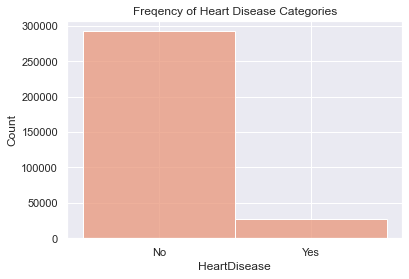

In [174]:
sns.histplot(data=hd, x='HeartDisease', kde=False, color='darksalmon')
plt.title("Freqency of Heart Disease Categories")
plt.show()

<p style='color:darksalmon;'><i>Very low probability of Heart Disease = Yes</i></p>

In [169]:
hd_comat = hd_prep.corr() #Numeric only 
# hd_comat['HeartDisease']
hd_comat['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

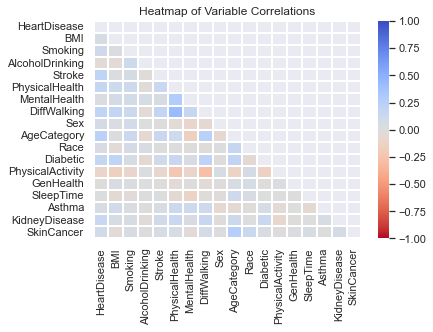

In [116]:
sns.heatmap(hd_prep.corr(), 
annot = False, fmt = '.2g', vmin=-1, vmax=1,center=0,linewidths=2, cmap = 'coolwarm_r', 
mask = np.triu(hd_prep.corr()))
plt.title('Heatmap of Variable Correlations')
plt.show()

<p style='color:darksalmon;'><i>Based on the heatmap--or Pearson corr matrix--and hd_comat, we can see that AgeCategory and a couple other variables are somewhat correlated with the target variable HeartDisease. We can also see that there may be cofounding or multicolinearity problems as there are variables (diffwalking and physicalhealth) that seem to be moderately correlated. </i></p>

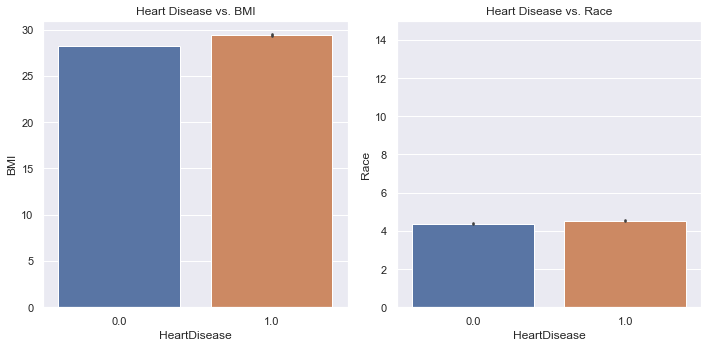

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.barplot(ax=axes[0],x="HeartDisease", y='BMI', data=hd_prep)
sns.set_theme(style="darkgrid")
axes[0].set_title('Heart Disease vs. BMI')

sns.barplot(ax=axes[1],x="HeartDisease", y='Race', data=hd_prep)
sns.set_theme(style="darkgrid")
axes[1].set_title('Heart Disease vs. Race')
plt.ylim([0, 15])   
fig.tight_layout()
plt.show()

In [148]:
# sns.catplot(y="AgeCategory", x='HeartDisease', hue='Stroke',data=hd_prep, kind="point") 
# plt.show()

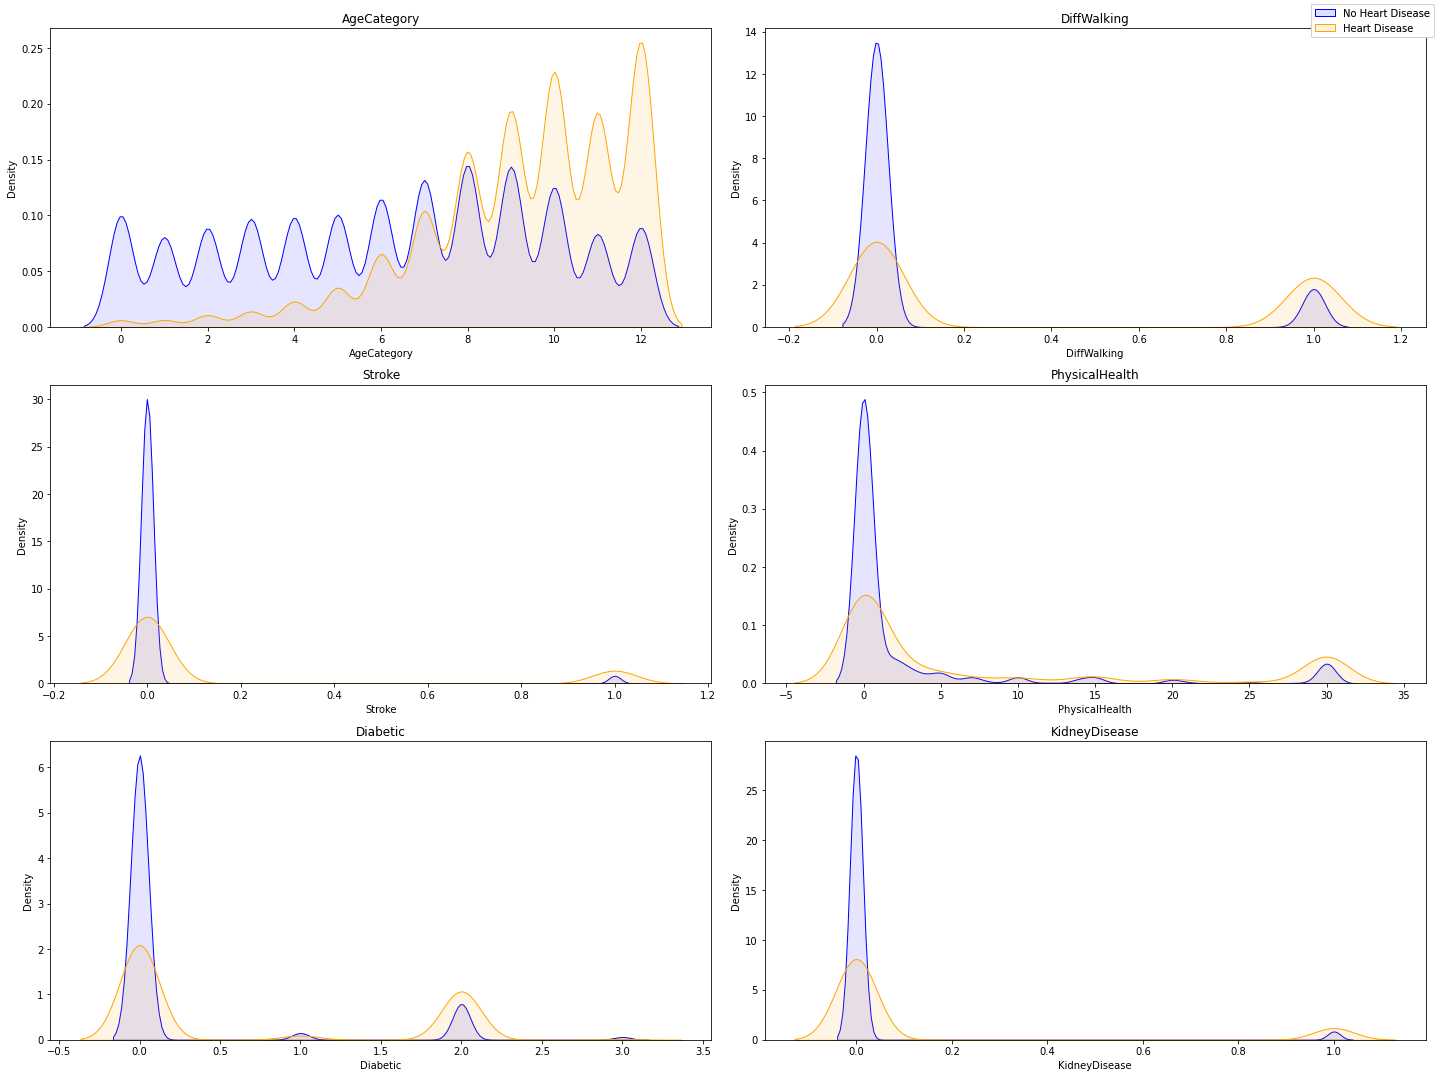

In [100]:
# pip install statsmodels 
# fig, ax = plt.subplots()

# sns.kdeplot(hd_prep[hd_prep["HeartDisease"]==0]["AgeCategory"], shade=True, color="blue", label="No Heart Disease", ax=ax, alpha=0.10)
# sns.kdeplot(hd_prep[hd_prep["HeartDisease"]==1]["AgeCategory"], shade=True, color="orange", label="Heart Disease", ax=ax, alpha=0.10)
# # sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

# ax.set_xlabel("Age Category")
# ax.set_ylabel("Density")
# plt.legend(loc='upper left')
# fig.suptitle("Age vs. Heart Disease");
vari = hd[['AgeCategory','DiffWalking','Stroke','PhysicalHealth','Diabetic', 'KidneyDisease']]
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(20,15))

for position, feature in zip(position_index, vari):
    set1 = hd_prep[hd_prep["HeartDisease"]==0][feature]
    set2 = hd_prep[hd_prep["HeartDisease"]==1][feature]
    sns.kdeplot(ax=axes[position], x=set1.loc[:], shade=True, color="blue", label="No Heart Disease", alpha=0.10)
    sns.kdeplot(ax=axes[position], x=set2.loc[:], shade=True, color="orange", label="Heart Disease", alpha=0.10)
#     plt.legend(loc='best')
    axes[position].set_title(feature)
    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = lines_labels[0]
    fig.legend(lines, labels)

fig.tight_layout()
plt.show()

In [215]:
hd_prep.describe() #max bmi is 94.85, very interesting 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,6.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,23.000000,1.000000,1.000000,1.000000


In [170]:
nm = hd['AgeCategory'].value_counts()
# dummy_tab = pd.crosstab(index=hd_prep['AgeCategory'], columns='freq')
# dummy_tab
# hd['AgeCategory'].unique() Used to quickly get labels for bottom plot
# for i in hd_prep['AgeCategory'].unique():
#     print(i)

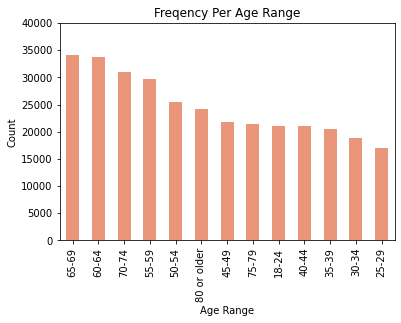

In [131]:
nm.plot(kind='bar', color='darksalmon')
plt.ylim([0, 40000])
plt.title('Freqency Per Age Range')
plt.ylabel('Count')
plt.xlabel('Age Range')
fig.tight_layout()
plt.show()

In [141]:
hd[hd['HeartDisease']=='Yes']['AgeCategory'].value_counts()

80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: AgeCategory, dtype: int64

In [145]:
hd[['HeartDisease','AgeCategory']].value_counts(normalize=True).sort_values()

HeartDisease  AgeCategory
Yes           18-24          0.000407
              25-29          0.000416
              30-34          0.000707
              35-39          0.000926
              40-44          0.001520
              45-49          0.002326
              50-54          0.004325
              55-59          0.006886
              60-64          0.010404
              75-79          0.012661
              65-69          0.012824
              70-74          0.015157
              80 or older    0.017039
No            25-29          0.052602
              75-79          0.054513
              30-34          0.057934
              80 or older    0.058487
              35-39          0.063334
              40-44          0.064166
              18-24          0.065461
              45-49          0.065814
              50-54          0.075045
              70-74          0.081984
              55-59          0.086165
              65-69          0.093966
              60-64     

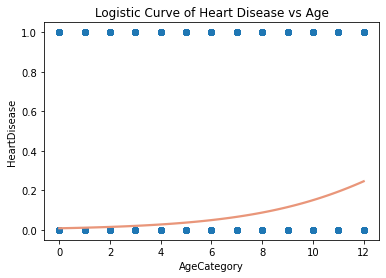

In [172]:
# sns.lmplot(x="AgeCategory", y="HeartDisease", data=hd_prep, logistic=True)
# plt.show()
sns.regplot(x='AgeCategory', y='HeartDisease', data=hd_prep, logistic=True, ci=None, line_kws={'color': 'darksalmon'})
plt.title('Logistic Curve of Heart Disease vs Age')
plt.show()


In [206]:
hd_prep.to_csv('~/Desktop/Internships/HeartDisease_clean.csv', index=False)
# random = pd.read_csv('HeartDisease_clean.csv')

<hr>
<h2 style='color:darksalmon'><u>Basic Predictive Modeling:</u></h2>

In [236]:
from sklearn.model_selection import train_test_split
x, y = hd_prep.loc[:, hd_prep.columns != 'HeartDisease'], hd_prep['HeartDisease']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.80,random_state=42)

<h4 style='color:darksalmon'><u>Logistic Regression:</u></h4>

In [231]:
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred), "\nRMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Accuracy :  0.9148165230851014 
RMSE:  0.291862085435739


<h4 style='color:darksalmon'><u>Naive Bayes:</u></h4>

In [242]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred),"\nRMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Accuracy: 0.8456354852327272 
RMSE:  0.3928924977233248


<h4 style='color:darksalmon'><u>Decision Tree:</u></h4>

In [248]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(random_state=42)

# # Training
tree = tree.fit(x_train, y_train)

# #Predict the response for test dataset
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred),"\nRMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Accuracy: 0.862247689926359 
RMSE:  0.37114998325965326



<p><b>Find the indepth choice of Logistic Regression in the Rmarkdown pdf:</b>
<br>
 <a href="https://github.com/KevinT-13/Prediction-Models/blob/main/HeartDisease_model.pdf" target="_blank">LogisticModel_R</a></p>

In [1]:
from IPython.display import IFrame
IFrame("HeartDisease_model.pdf", width=600, height=300)